## EDA: Visualizing the Data Breakdown Between Troll and Normal Tweets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

final_tweet_df = pd.read_csv('final_tweet_df.csv')
desc_vecs_df = pd.read_csv('desc_vecs_df.csv')
text_vecs_df = pd.read_csv('desc_vecs_df.csv')

In [2]:
final_tweet_df = final_tweet_df.drop('Unnamed: 0', axis = 1)
desc_vecs_df = desc_vecs_df.drop('Unnamed: 0', axis = 1)
text_vecs_df = text_vecs_df.drop('Unnamed: 0', axis = 1)

target = final_tweet_df['troll_tweet']
user_cols = ['unique_id', 'user_handle']
drop_cols = ['troll_tweet','unique_id', 'user_handle']

#### Though ultimately a productive model was found, the main failing of this study is imbalance and any future studies will need to take that problem into account. Specifically: the nefarious troll tweet dataset featured, understandably, a finite number of specific accounts. How that broke down in the final data set can be see below:

In [7]:
len(final_tweet_df[final_tweet_df['troll_tweet'] == 1]['user_handle'].unique())

261

In [8]:
len(final_tweet_df[final_tweet_df['troll_tweet'] == 0]['user_handle'].unique())

10253

#### Now, I do think promising features were discovered and their importance captured, but I do highly suspect their importance is very exaggerated in this study due to the nature of the imbalance. As will become clear in the modeling portion of this study, those categories which tailor most specifically to user information are very highly ranked for their importance. This makes sense and dampens the impact of the comparison when you consider that there are far fewer unique nefarious users in the dataset than unique normal users. However, the breakdown is below.

In [9]:
normal_tweets = final_tweet_df[final_tweet_df['troll_tweet'] == 0]
troll_tweets = final_tweet_df[final_tweet_df['troll_tweet'] == 1]

### The number 1 most important feature according to the models is the creation delta. Now, this makes sense when you consider that the limited number of troll accounts limits how many deltas there are. However, it does also seem to make sense that these accounts, having been created for a specific purpose, were created around similar times while normal accounts were created more randomly. The greater relative randomness of normal accounts will be a recurrent theme.

<AxesSubplot:ylabel='Frequency'>

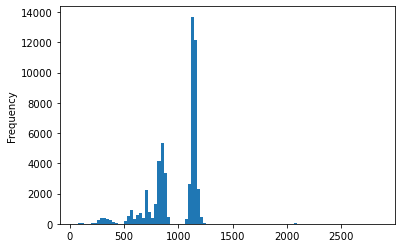

In [30]:
troll_tweets['creation_delta'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

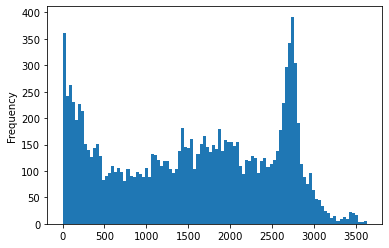

In [29]:
normal_tweets['creation_delta'].plot.hist(bins=100)

<AxesSubplot:xlabel='troll_tweet', ylabel='creation_delta'>

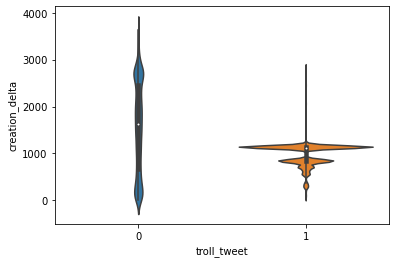

In [13]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='creation_delta')

<AxesSubplot:ylabel='Frequency'>

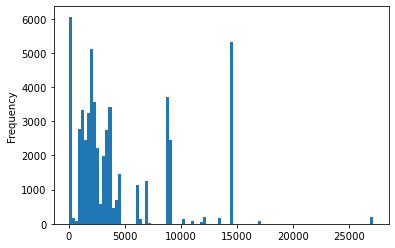

In [21]:
troll_tweets['user_favorites_count'].plot.hist(bins=100)

In [22]:
troll_tweets['user_favorites_count'].mean()

4442.91922025738

In [23]:
troll_tweets['user_favorites_count'].max()

27181

<AxesSubplot:ylabel='Frequency'>

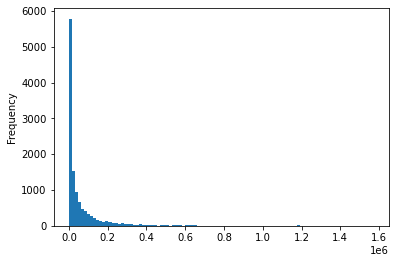

In [20]:
normal_tweets['user_favorites_count'].plot.hist(bins=100)
#WOW these numbers are extremely different

In [24]:
normal_tweets['user_favorites_count'].mean()

65586.74155749044

In [25]:
normal_tweets['user_favorites_count'].max()

1569811

<AxesSubplot:xlabel='troll_tweet', ylabel='user_favorites_count'>

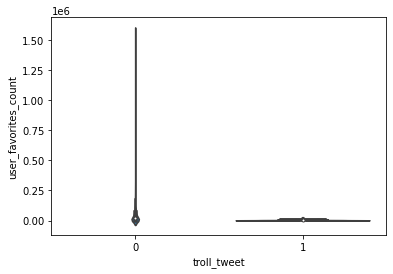

In [14]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='user_favorites_count')

<AxesSubplot:ylabel='Frequency'>

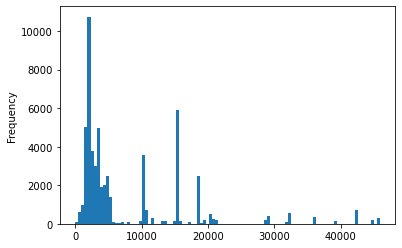

In [27]:
troll_tweets['statuses_count'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

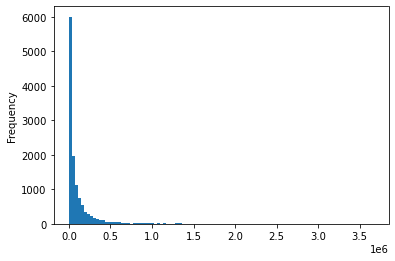

In [28]:
normal_tweets['statuses_count'].plot.hist(bins=100)

<AxesSubplot:xlabel='troll_tweet', ylabel='statuses_count'>

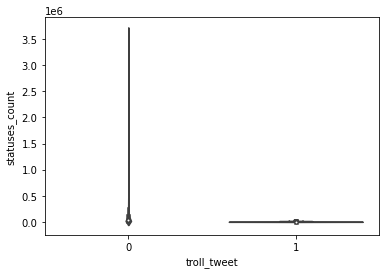

In [31]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='statuses_count')

<AxesSubplot:ylabel='Frequency'>

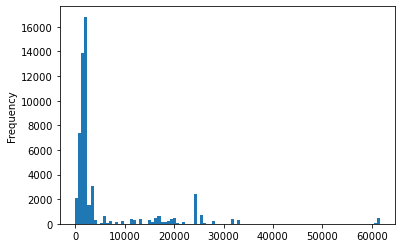

In [32]:
troll_tweets['followers_count'].plot.hist(bins=100)

In [40]:
troll_tweets['followers_count'].mean()

5412.386106535865

In [42]:
troll_tweets['followers_count'].max()

61609

<AxesSubplot:ylabel='Frequency'>

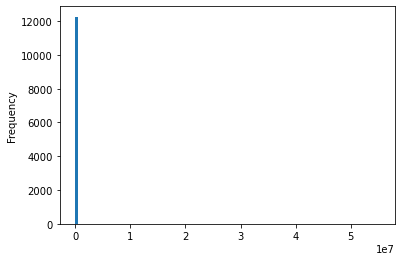

In [36]:
normal_tweets['followers_count'].plot.hist(bins=100)
#It looks like most normal accounts have few followers, though normal accounst occassionally have outliers with huge
#amounts of followers

In [38]:
normal_tweets['followers_count'].mean()

17380.99853527545

In [39]:
normal_tweets['followers_count'].max() #Whoa I wonder who that was.

55245748

<AxesSubplot:xlabel='troll_tweet', ylabel='followers_count'>

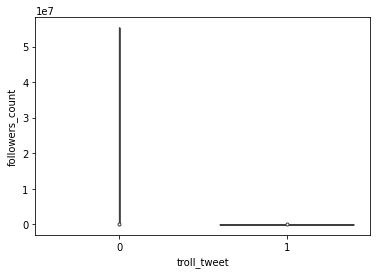

In [37]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='followers_count')

#### The retweet count category and its high importance to the dataset following is actually FASCINATING considering there are about 5x more troll tweets than normal tweets in the dataset. This category is also not affected by the number of individual users in the dataset because it pertains to individual tweet engagement, not account information. One way to think about this is that normal users have a broader spread and are more likely to have a high enough follower count to get high engagement.

<AxesSubplot:ylabel='Frequency'>

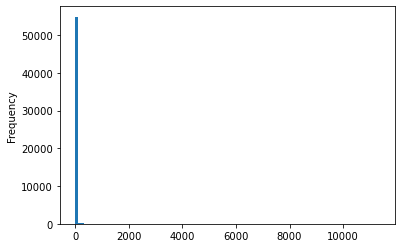

In [47]:
troll_tweets['retweet_count'].plot.hist(bins=100)

In [48]:
troll_tweets['retweet_count'].mean()

3.6639939184419625

In [49]:
troll_tweets['retweet_count'].max()

11363

<AxesSubplot:ylabel='Frequency'>

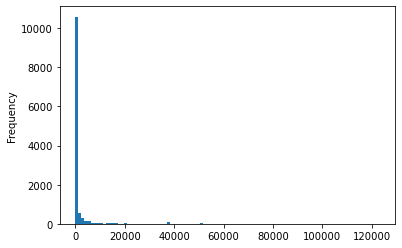

In [44]:
normal_tweets['retweet_count'].plot.hist(bins=100)

In [50]:
normal_tweets['retweet_count'].mean()

1435.8314753031166

In [51]:
normal_tweets['retweet_count'].max()

123215

<AxesSubplot:xlabel='troll_tweet', ylabel='retweet_count'>

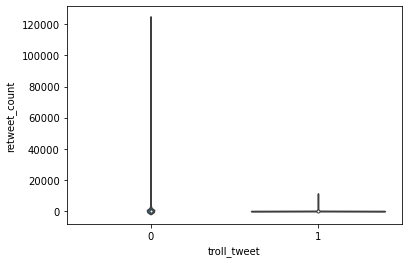

In [45]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='retweet_count')

#### Note: 'friends' in the Twitter docs refers to the number of accounts followed by a given user.

<AxesSubplot:ylabel='Frequency'>

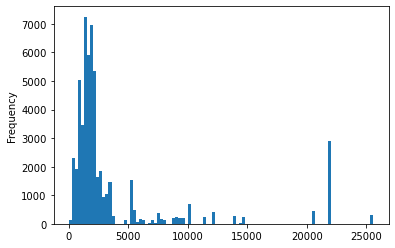

In [52]:
troll_tweets['friends_count'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

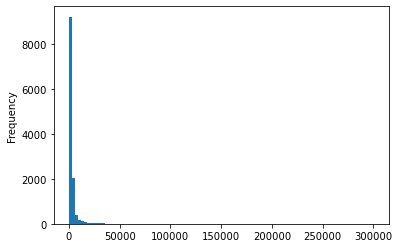

In [53]:
normal_tweets['friends_count'].plot.hist(bins=100)

<AxesSubplot:xlabel='troll_tweet', ylabel='friends_count'>

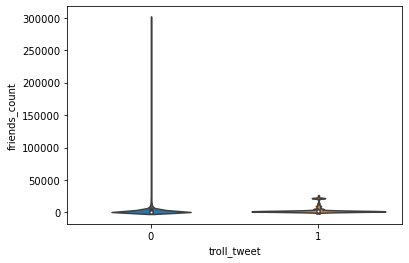

In [54]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='friends_count')

<AxesSubplot:ylabel='Frequency'>

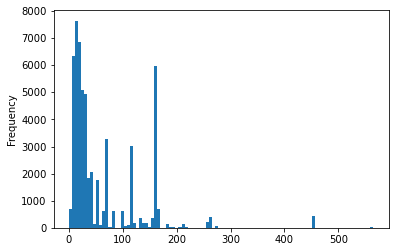

In [55]:
troll_tweets['listed_count'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

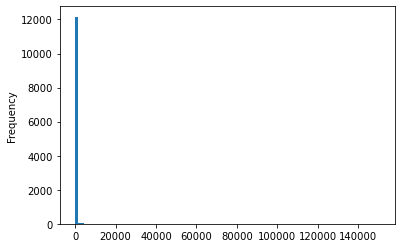

In [56]:
normal_tweets['listed_count'].plot.hist(bins=100)

<AxesSubplot:xlabel='troll_tweet', ylabel='listed_count'>

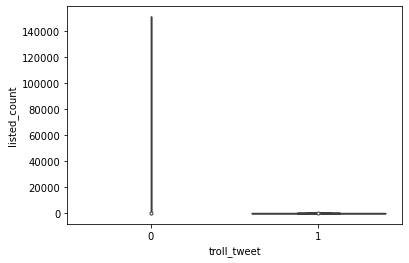

In [57]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='listed_count')

<AxesSubplot:ylabel='Frequency'>

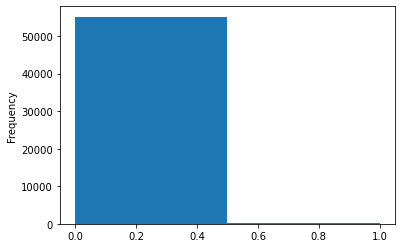

In [66]:
troll_tweets['source_name_twitter for iphone'].plot.hist(bins=2)

<AxesSubplot:ylabel='Frequency'>

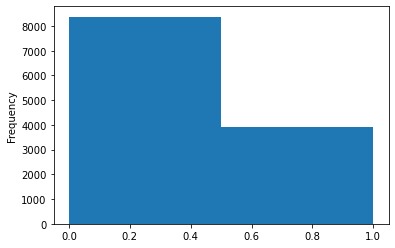

In [67]:
normal_tweets['source_name_twitter for iphone'].plot.hist(bins=2)

<AxesSubplot:ylabel='Frequency'>

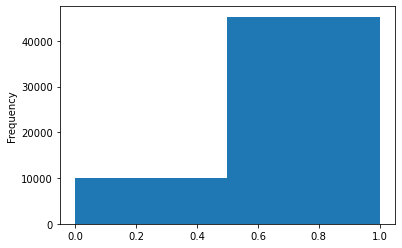

In [69]:
troll_tweets['source_name_twitter web client'].plot.hist(bins=2)

<AxesSubplot:ylabel='Frequency'>

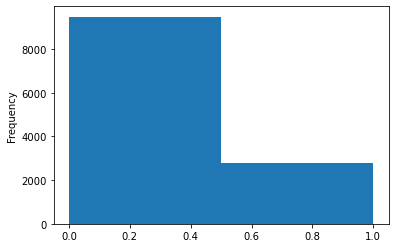

In [70]:
normal_tweets['source_name_twitter web client'].plot.hist(bins=2)

<AxesSubplot:ylabel='Frequency'>

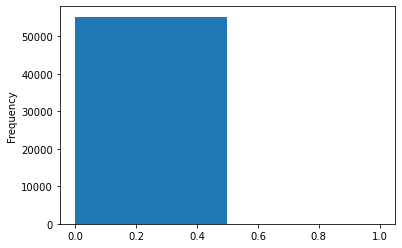

In [71]:
troll_tweets['source_name_twitter for android'].plot.hist(bins=2)

<AxesSubplot:ylabel='Frequency'>

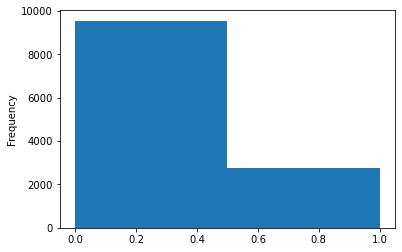

In [72]:
normal_tweets['source_name_twitter for android'].plot.hist(bins=2)

<AxesSubplot:ylabel='Frequency'>

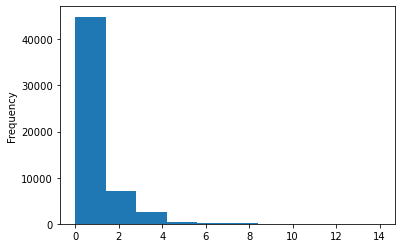

In [75]:
troll_tweets['mention_count'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

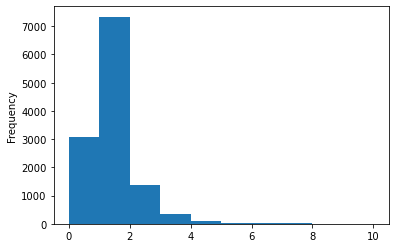

In [76]:
normal_tweets['mention_count'].plot.hist(bins=10)

<AxesSubplot:xlabel='troll_tweet', ylabel='mention_count'>

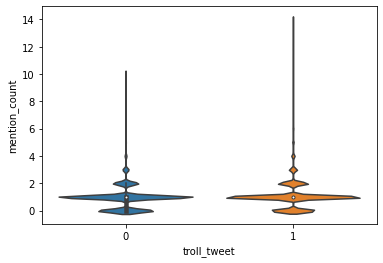

In [77]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='mention_count')

<AxesSubplot:ylabel='Frequency'>

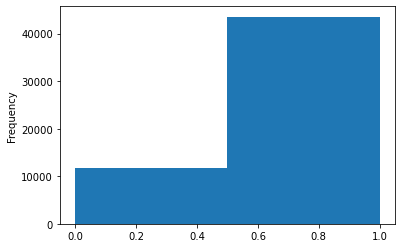

In [82]:
troll_tweets['retweeted'].plot.hist(bins=2)
#This might explain why the text vectors yielded nothing since the tendency, evidently, is to 
#retweet. Though I did try it with the retweets removed and I still got nowhere.

<AxesSubplot:ylabel='Frequency'>

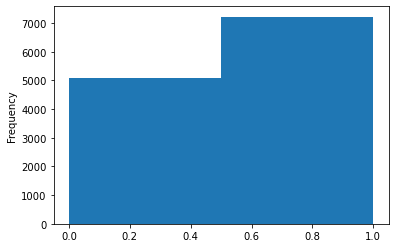

In [83]:
normal_tweets['retweeted'].plot.hist(bins=2)

<AxesSubplot:ylabel='Frequency'>

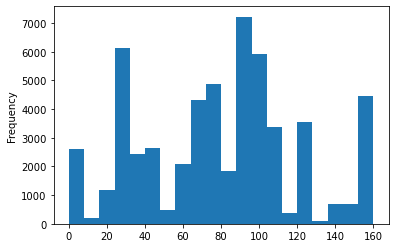

In [86]:
troll_tweets['desc_length'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

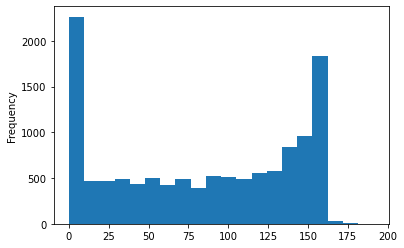

In [87]:
normal_tweets['desc_length'].plot.hist(bins=20)

<AxesSubplot:xlabel='troll_tweet', ylabel='desc_length'>

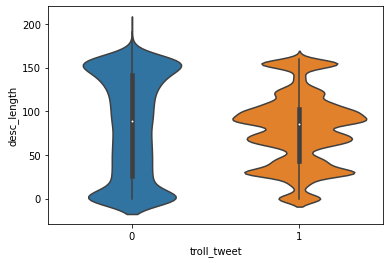

In [88]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='desc_length')

<AxesSubplot:ylabel='Frequency'>

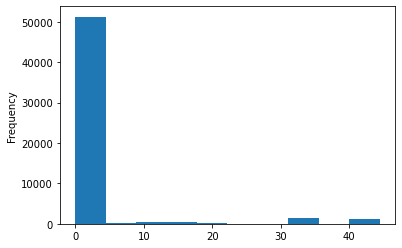

In [79]:
troll_tweets['num_handle_pct'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

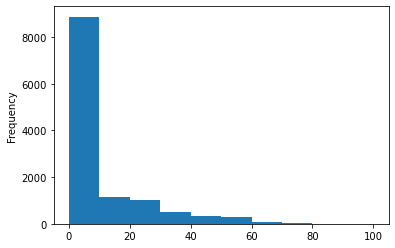

In [80]:
normal_tweets['num_handle_pct'].plot.hist(bins=10)

<AxesSubplot:xlabel='troll_tweet', ylabel='num_handle_pct'>

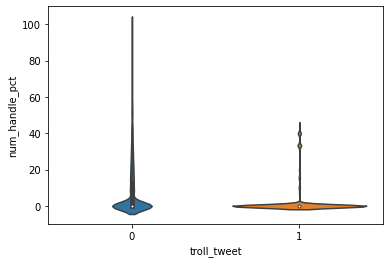

In [81]:
sns.violinplot(data=final_tweet_df, x='troll_tweet',y='num_handle_pct')

<AxesSubplot:>

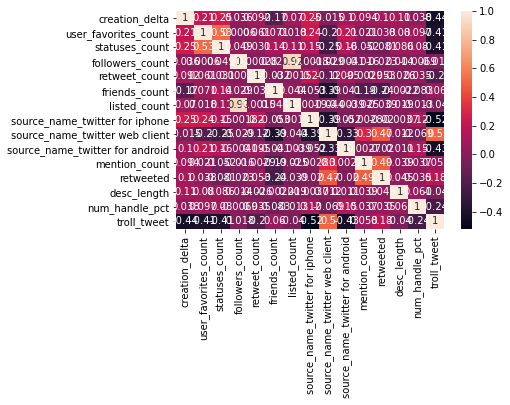

In [90]:
important_array = ['creation_delta', 'user_favorites_count', 'statuses_count', 'followers_count', 'retweet_count',
                  'friends_count', 'listed_count', 'source_name_twitter for iphone', 'source_name_twitter web client',
                  'source_name_twitter for android', 'mention_count', 'retweeted', 'desc_length', 'num_handle_pct', 
                  'troll_tweet']
sns.heatmap(final_tweet_df[important_array].corr(), annot=True)

### You can see about that 'twitter web client' as the source was a high indicator that the account was a troll. Also a large creation delta made it less likely, as did a high user favorites count and statuses count. Being connected to twitter through twitter for iphone or through twitter for android meant in all likelihood the account was not a troll. You can also see that there's a correlation between a tweet's mention count and whether it's a retweet, which makes sense since a retweet guarantees one mention.